## Descriptive Analysis

A notebook to describe the data set with simple statistical tools.

In [66]:
import pandas as pd
import pathlib
import seaborn as sns
import matplotlib.pyplot as plt


import ml_colon

### Setting up Data Directory

In [67]:
data_dir = ml_colon.HERE.parents[2] / "data" 
print(data_dir)

assert data_dir.exists()

data_files = list(data_dir.glob("*.csv"))
print([f.name for f in data_files])

assert data_files

/home/agemcipe/personal_dump/data_processes_mlcolonoscopy/data
['data_description.csv', 'raw_data.csv']


### Loading Raw Data

In [21]:
_filepath = data_dir / "raw_data.csv"
df = pd.read_csv(_filepath)

# assert all rows have been loaded
len(df) == sum(1 for i in open(_filepath)) -1 # file has header

print(f"Raw data set has: {len(df)} rows")

Raw data set has: 16000 rows


In [73]:
descr_df = pd.read_csv(data_dir / "data_description.csv", index_col="column_name")

In [74]:
print(descr_df)

                                                         description
column_name                                                         
quality              a measure of the quality of the recorded video.
bits               number of bits used to encode that block in th...
intra_parts        number sub-blocks inside this block that are n...
skip_parts         number sub-blocks inside this block that are s...
inter_16x16_parts  number of sub-blocks inside this block making ...
inter_4x4_parts    number of sub-blocks inside this block making ...
inter_other_parts  number of sub-blocks inside this block making ...
non_zero_pixels    number of pixels different from 0 after encodi...
frame_width                  the width of the video frame in pixels.
frame_height                the height of the video frame in pixels.
movement_level     a measure of the level of movement of this fra...
mean                        mean of the pixels of the encoded block.
sub_mean_1         mean of the pix

Let's take a quick look at the datatypes in the dataframe

In [22]:
df.dtypes

quality                int64
bits                   int64
intra_parts            int64
skip_parts             int64
inter_16x16_parts      int64
inter_4x4_parts        int64
inter_other_parts      int64
non_zero_pixels        int64
frame_width            int64
frame_height           int64
movement_level         int64
mean                 float64
sub_mean_1           float64
sub_mean_2           float64
sub_mean_3           float64
sub_mean_4           float64
var_sub_blocks       float64
sobel_h              float64
sobel_v              float64
variance             float64
block_movement_h     float64
block_movement_v     float64
var_movement_h       float64
var_movement_v       float64
cost_1               float64
cost_2               float64
relevant             float64
dtype: object

Conclusion:
Looks like we are only dealing with numerical data (no characters, strings, datetimes, ...)
 

### Missing Values?

Next, let's take a look if there are any Nulls, NaNs in the data set and if so how many.

In [41]:
_null_df = df.isnull().sum()

print(_null_df[_null_df > 0])

sub_mean_3    14
cost_2        17
relevant       2
dtype: int64


The missing values for sub_mean_3 and cost_2 maybe can be imputed / recovered.

For the target variable "relevant" not. It's probably best to drop these 2 rows as we later also want to exclude them from training / testing the model and its only a total of 2 rows...

In [43]:
df = df[~df.relevant.isnull()]

len(df)

15998

### Column Analysis

We want to go over each variable in the dataset and explore it with simple descriptive statistics.

A first overview can be seen here:

In [18]:
df.describe()

,quality,bits,intra_parts,skip_parts,inter_16x16_parts,inter_4x4_parts,inter_other_parts,non_zero_pixels,frame_width,frame_height,...,sobel_h,sobel_v,variance,block_movement_h,block_movement_v,var_movement_h,var_movement_v,cost_1,cost_2,relevant
count,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,...,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,15983.000000,15998.000000
mean,29.500000,449.837312,11.040000,0.849187,0.995437,1.978687,3.686437,74.087125,1432.000000,850.000000,...,8.027763,8.271249,53.332864,8.023825,6.797076,841.948320,491.913447,36948.640625,42059.829569,0.822353
std,5.590345,549.338243,19.050616,1.181855,1.018507,3.901610,4.446710,102.640728,851.904548,530.205215,...,9.184907,9.552508,107.265796,17.259731,11.552299,3815.230446,2404.069505,38631.383338,43844.708679,0.382227
min,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,416.000000,240.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.750000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,728.000000,420.000000,...,0.897705,0.943359,1.424867,0.500000,0.500000,0.687500,0.746094,9916.750000,10965.000000,1.000000
50%,29.500000,243.000000,0.000000,0.000000,1.000000,0.000000,2.000000,33.000000,1376.000000,780.000000,...,5.171387,5.313477,14.525076,2.625000,3.210938,11.683594,19.527344,23051.500000,26135.000000,1.000000
75%,33.250000,622.000000,16.000000,1.000000,2.000000,3.000000,6.000000,100.000000,2080.000000,1210.000000,...,11.629883,11.776611,52.498296,7.062500,8.062500,94.025574,96.064392,52071.250000,59876.500000,1.000000
max,37.000000,4771.000000,64.000000,4.000000,4.000000,33.000000,27.000000,828.000000,2560.000000,1600.000000,...,69.706055,66.775391,2022.197998,322.093750,189.000000,194634.750000,68389.359375,425705.000000,446306.000000,1.000000


#### Column: Quality

a measure of the quality of the recorded video.


<AxesSubplot:ylabel='Count'>

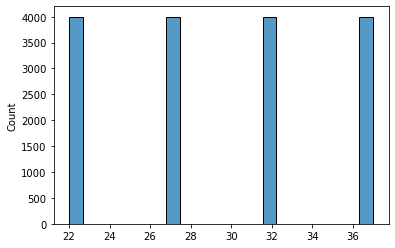

In [79]:
column_name = "quality"
print(descr_df.loc[column_name, "description"])

sns.histplot(df[column_name].values)

In [61]:
df[column_name].value_counts()

37    4000
27    4000
32    4000
22    3998
Name: quality, dtype: int64

Looks like a Discrete uniform distribution, but maybe data set was sampled in that way...


#### Column: Bits

In [91]:

column_name = "bits"
print(descr_df.loc[column_name, "description"])

number of bits used to encode that block in the video stream.


<AxesSubplot:title={'center':'Histogram of bits'}, ylabel='Count'>

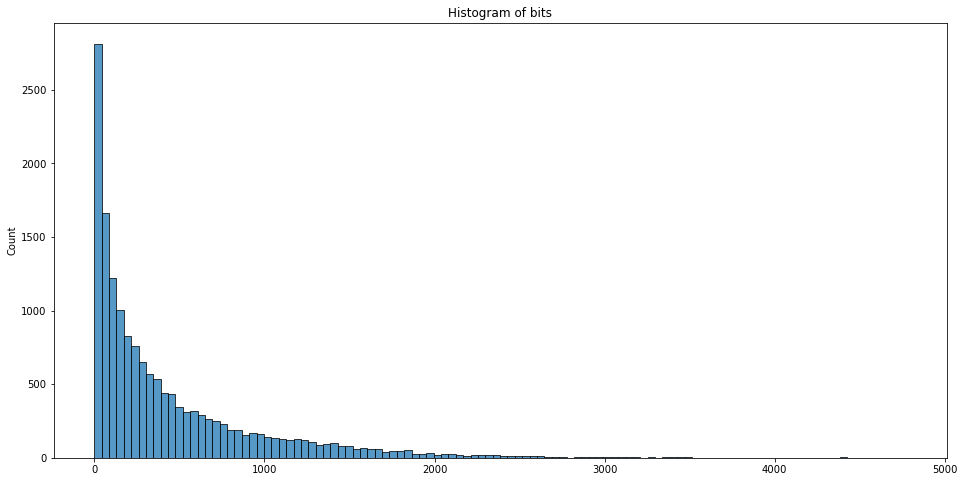

In [92]:

fig, ax = plt.subplots(figsize=(16,8))

ax.set_title(f"Histogram of {column_name}")

sns.histplot(df[column_name].values, ax=ax)

The distribution is highly skewed and it looks like most of the blocks are encoded using only a few bits.
This raises the question: Are there blocks that allegedly are encoded with 0 bits in the video stream?

Note: This should not be possible as 0 bits would mean 0 information in my opinion. 

In [108]:
print("Number of rows with 0 bits: ", len(df[df[column_name] ==0]))

Number of rows with 0 bits:  147


In [120]:
pd.cut(df[column_name], bins=[0, 8, 16, 32, 64, 124], include_lowest=False).value_counts(sort=False)

(0, 8]        696
(8, 16]       419
(16, 32]      964
(32, 64]     1494
(64, 124]    1818
Name: bits, dtype: int64

There are some block that are encoded with a very small number of bits. 696 rows are encoded with at most 8 bits. Will be interesting to see how quality depends on number of bits...For now we keep these rows but potentially these rows we have to deal with separately.

#### intra_parts

In [121]:
column_name = "intra_parts"
print(descr_df.loc[column_name, "description"])

number sub-blocks inside this block that are not encoded by making use of information in other frames.


<AxesSubplot:title={'center':'Histogram of intra_parts'}, ylabel='Count'>

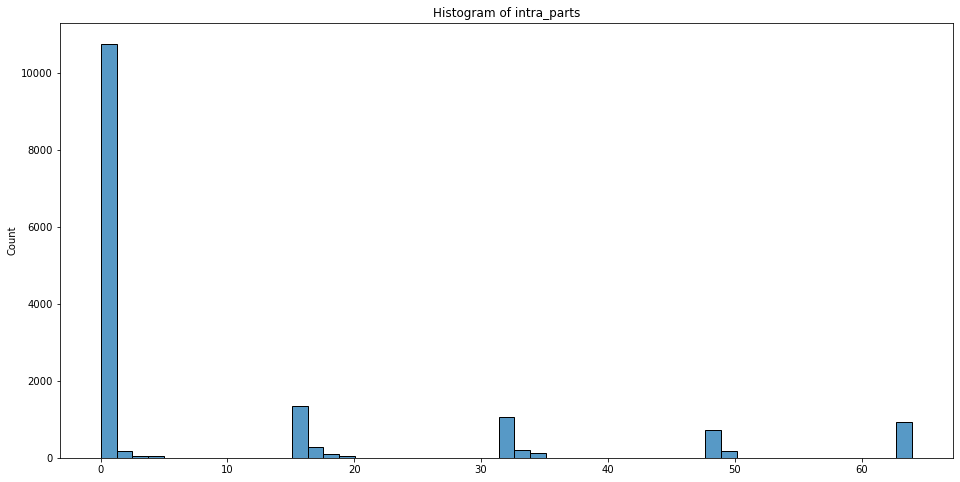

In [122]:
fig, ax = plt.subplots(figsize=(16,8))

ax.set_title(f"Histogram of {column_name}")

sns.histplot(df[column_name].values, ax=ax)

In [126]:
df[column_name].value_counts(sort=False)

0     10310
16     1355
32     1060
48      718
64      919
1       440
17      280
33      198
49      176
2       177
18       97
34      115
3        45
19       55
4        53
Name: intra_parts, dtype: int64

The big majority of rows have 0 sub-blocks. Not sure if I yet understand what these sub-blocks are...

#### skip_parts

In [127]:
column_name = "skip_parts"
print(descr_df.loc[column_name, "description"])

number sub-blocks inside this block that are straight-forward copied from another frame.


<AxesSubplot:title={'center':'Histogram of skip_parts'}, xlabel='skip_parts', ylabel='Count'>

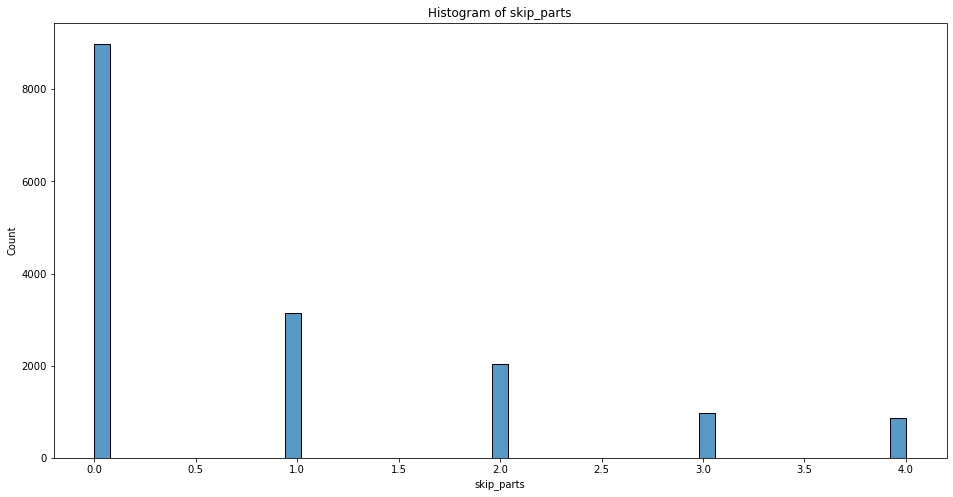

In [141]:
fig, ax = plt.subplots(figsize=(16,8))

ax.set_title(f"Histogram of {column_name}")
sns.histplot(df[column_name])